In [9]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn.preprocessing as pre
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#logistic library
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
import os
os.getcwd()

'C:\\Users\\USER'

In [12]:
os.chdir('C:\\Users\\USER\\Documents')

In [15]:
df = pd.read_csv('Student_recruitment.csv')
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [16]:
df = df.set_index('sl_no')

In [17]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [20]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [23]:
new = df[df['status']  == 'Not Placed']
new

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN


# Separation of Categorical and Numerical columns

In [27]:
num_col = df.select_dtypes(exclude=['object']).columns
cat_col = df.select_dtypes(include=['object']).columns

In [29]:
num_col, cat_col

(Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object'),
 Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
        'specialisation', 'status'],
       dtype='object'))

In [30]:
df[num_col]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0
2,79.33,78.33,77.48,86.5,66.28,200000.0
3,65.00,68.00,64.00,75.0,57.80,250000.0
4,56.00,52.00,52.00,66.0,59.43,NaN
5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,400000.0
212,58.00,60.00,72.00,74.0,53.62,275000.0
213,67.00,67.00,73.00,59.0,69.72,295000.0


In [31]:
df[cat_col]

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
2,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
3,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
4,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
5,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
211,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
212,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
213,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed


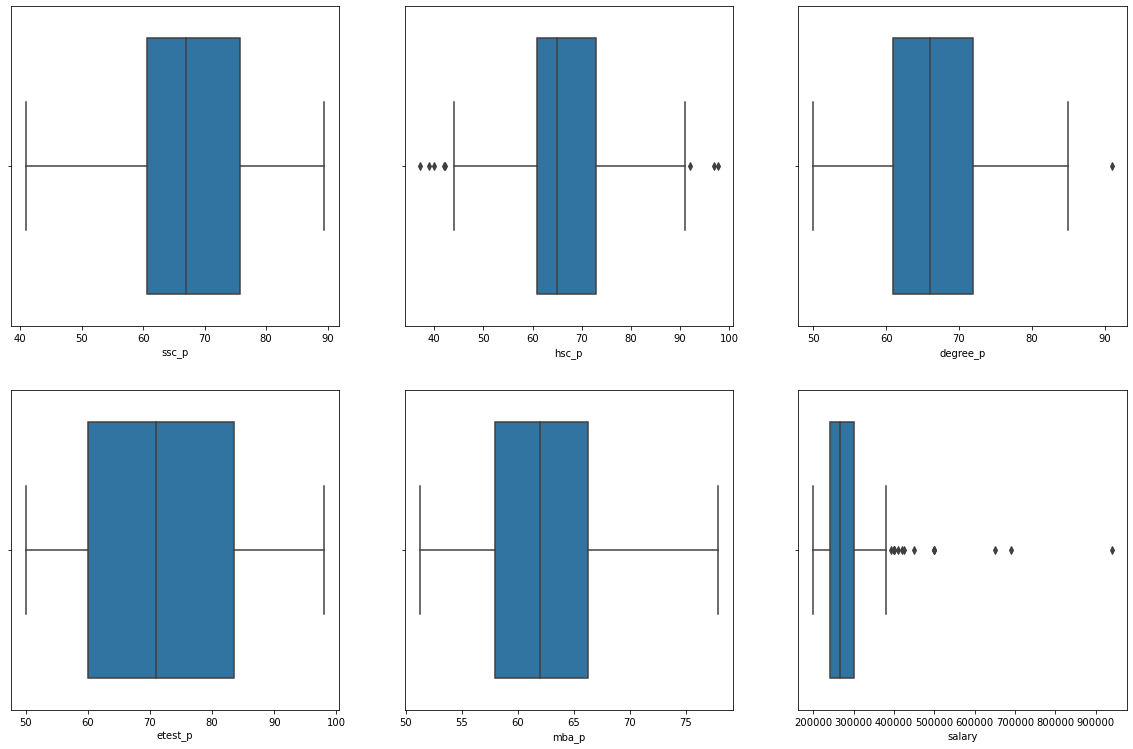

In [33]:
plt.figure(figsize = (20,20))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[num_col[i]])

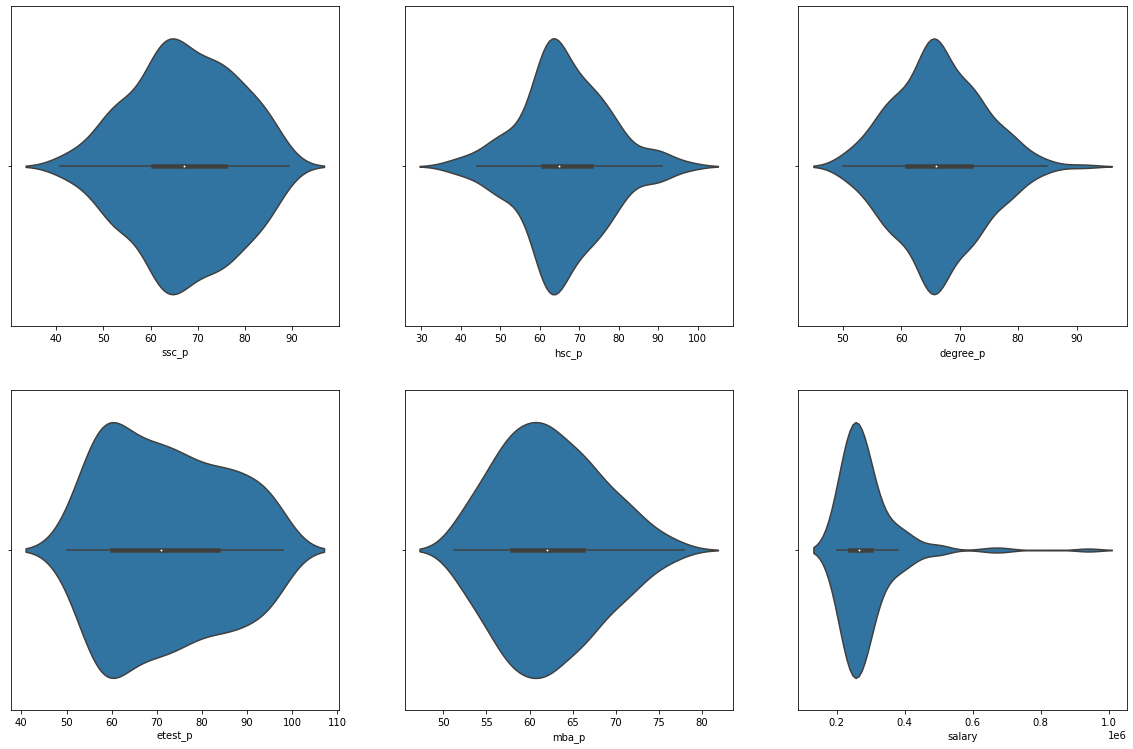

In [34]:
plt.figure(figsize = (20,20))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.violinplot(df[num_col[i]])

### Insight
all the remaining columns are approximately normal except salary but salary will be dropped

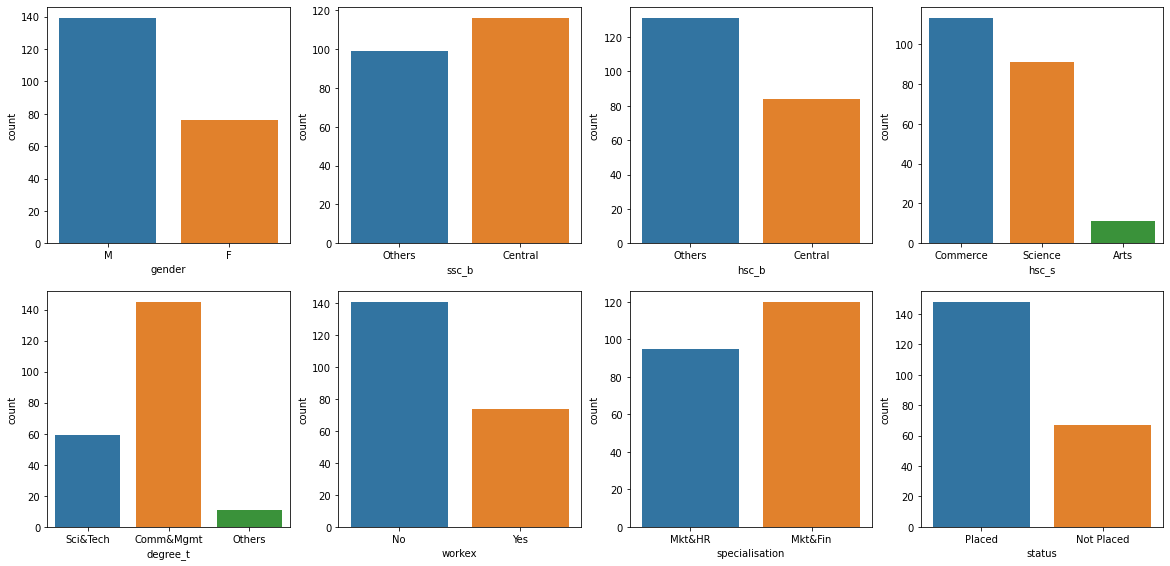

In [35]:
plt.figure(figsize = (20,20))
for i in range(len(cat_col)):
    plt.subplot(4,4,i+1)
    sns.countplot(df[cat_col[i]])

In [36]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [45]:
# Encoding of categorical data
LB = pre.LabelEncoder()
for i in cat_col:
    df[i] = LB.fit_transform(df[i])
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [54]:
df.drop('salary', axis =1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
sl_no,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1


In [56]:
df = df.drop('salary', axis =1)

In [62]:
num_col

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [63]:
#categorizing the numerical columns now

def get_bins(dataframe, column_name, bin_num):
    lower = df[column_name].min()
    upper = df[column_name].max()
    bins = np.linspace(lower, upper, bin_num+1)
    return bins

In [64]:
get_bins(df, 'hsc_p', 2)

array([37.  , 67.35, 97.7 ])

In [66]:
df[num_col].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [71]:
for i in num_col:
    df[i] = pd.cut(df[i], bins = get_bins(df, i, 2), labels = [0,1], include_lowest = True )
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ssc_p     215 non-null    category
 1   hsc_p     215 non-null    category
 2   degree_p  215 non-null    category
 3   etest_p   215 non-null    category
 4   mba_p     215 non-null    category
dtypes: category(5)
memory usage: 11.4 KB


In [92]:
for i in num_col:
    df[i] = pd.to_numeric(df[i])
df[num_col].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ssc_p     215 non-null    int32
 1   hsc_p     215 non-null    int32
 2   degree_p  215 non-null    int32
 3   etest_p   215 non-null    int32
 4   mba_p     215 non-null    int32
dtypes: int32(5)
memory usage: 14.0 KB


In [93]:
df[num_col]

,ssc_p,hsc_p,degree_p,etest_p,mba_p
sl_no,,,,,
1,1,1,0,0,0
2,1,1,1,1,1
3,0,1,0,1,0
4,0,0,0,0,0
5,1,1,1,1,0
...,...,...,...,...,...
211,1,1,1,1,1
212,0,0,1,0,0
213,1,0,1,0,1


# Features Selection

<AxesSubplot:>

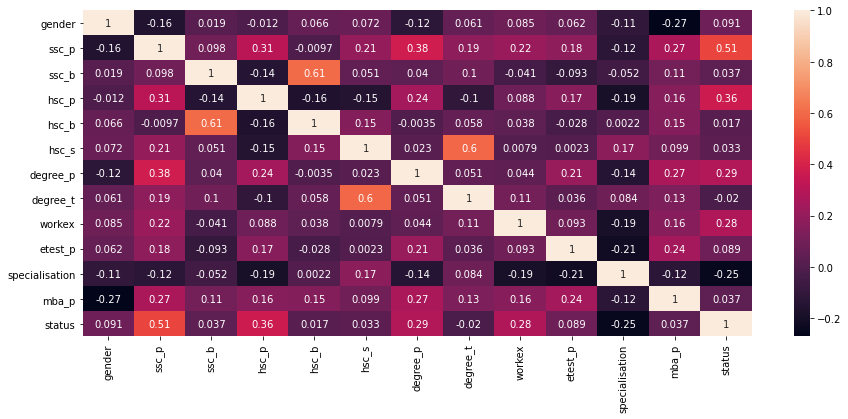

In [97]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot = True)

In [140]:
mutual_info = mutual_info_classif(df.drop('status', axis = 1), df['status']) # testing contribution of each indepenedent variable to dependent variable


In [141]:
mutual_info

array([0.        , 0.12381328, 0.02418143, 0.06650768, 0.        ,
       0.        , 0.01078731, 0.0100335 , 0.02132508, 0.01176147,
       0.0176058 , 0.02079247])

In [142]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df.drop('status', axis = 1).columns


In [143]:
mutual_info = mutual_info.sort_values(ascending = False)

In [144]:
mutual_info

ssc_p             0.123813
hsc_p             0.066508
ssc_b             0.024181
workex            0.021325
mba_p             0.020792
specialisation    0.017606
etest_p           0.011761
degree_p          0.010787
degree_t          0.010034
gender            0.000000
hsc_b             0.000000
hsc_s             0.000000
dtype: float64

In [152]:
sel_col= []
for i in range(len(mutual_info)):
    if (mutual_info[i] >0):
        sel_col.append(mutual_info.index[i])
sel_col.append('status')
sel_col

['ssc_p',
 'hsc_p',
 'ssc_b',
 'workex',
 'mba_p',
 'specialisation',
 'etest_p',
 'degree_p',
 'degree_t',
 'status']

In [153]:
new_df = df[sel_col]
new_df

,ssc_p,hsc_p,ssc_b,workex,mba_p,specialisation,etest_p,degree_p,degree_t,status
sl_no,,,,,,,,,,
1,1,1,1,0,0,1,0,0,2,1
2,1,1,0,1,1,0,1,1,2,1
3,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,0,0,2,0
5,1,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
211,1,1,1,0,1,0,1,1,0,1
212,0,0,1,0,0,0,0,1,2,1
213,1,0,1,1,1,0,0,1,0,1


In [168]:
new_df_1 = df
sel_top7 = SelectKBest(mutual_info_classif, k=7)
sel_top7.fit(new_df_1.drop('status', axis=1), new_df_1['status'])

list(new_df_1.drop('status', axis=1).columns[sel_top7.get_support()])

['ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p', 'workex', 'specialisation']

In [169]:
sel_top7 = list(new_df_1.drop('status', axis=1).columns[sel_top7.get_support()])
sel_top7.append('status')
new_df_1 = new_df_1[sel_top7]
new_df_1.head()

,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,specialisation,status
sl_no,,,,,,,,
1,1,1,1,1,0,0,1,1
2,1,0,1,1,1,1,0,1
3,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,0
5,1,0,1,0,1,0,0,1


# Building the model

In [180]:
l_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(df.drop('status', axis = 1), 
                                                    df['status'], test_size = 0.25, random_state = 42, 
                                                    stratify = df['status'])

In [181]:
l_reg.fit(X_train, y_train)

LogisticRegression()

In [188]:
y_pred = l_reg.predict(X_test)

In [189]:
# checking for accuracy of the model
confusion_matrix(y_test, y_pred)

array([[10,  7],
       [ 4, 33]], dtype=int64)

In [194]:
round(accuracy_score(y_test, y_pred), 4)

0.7963

<AxesSubplot:>

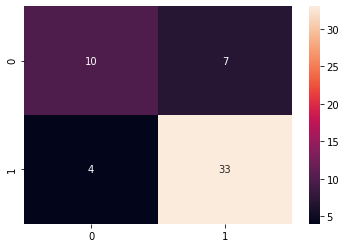

In [196]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [197]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.71      0.59      0.65        17\n           1       0.82      0.89      0.86        37\n\n    accuracy                           0.80        54\n   macro avg       0.77      0.74      0.75        54\nweighted avg       0.79      0.80      0.79        54\n'

In [198]:
# for new_df
l_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('status', axis = 1), 
                                                    df['status'], test_size = 0.25, random_state = 42, 
                                                    stratify = new_df['status'])

In [199]:
l_reg.fit(X_train, y_train)

LogisticRegression()

In [201]:
y_pred = l_reg.predict(X_test)

In [202]:
confusion_matrix(y_test, y_pred)

array([[10,  7],
       [ 5, 32]], dtype=int64)

<AxesSubplot:>

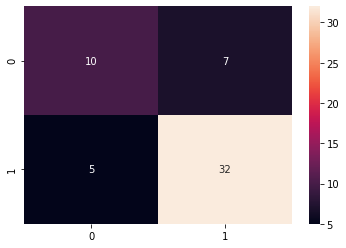

In [203]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [205]:
round(accuracy_score(y_test, y_pred), 3)

0.778

In [206]:
# for new_df_1
l_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(new_df_1.drop('status', axis = 1), 
                                                    df['status'], test_size = 0.25, random_state = 42, 
                                                    stratify = new_df_1['status'])

In [207]:
l_reg.fit(X_train, y_train)

LogisticRegression()

In [210]:
y_pred = l_reg.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[11,  6],
       [ 2, 35]], dtype=int64)

<AxesSubplot:>

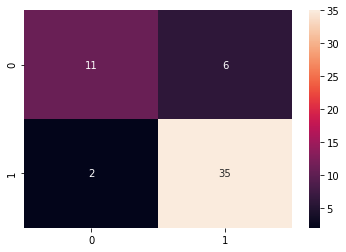

In [211]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [213]:
round(accuracy_score(y_test, y_pred),3)

0.852